<a href="https://colab.research.google.com/github/BRIJNANDA1979/BIGEARTHNET/blob/main/BigEarthNet_CNN_for_uniquely_labelled_46_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BigEarthNet unique labelled data with 46 classes from data uploaded on google drive.

Step  1: to create geotiff image using 12 bands of Sentinel-2 imagery 
Step 2 :  to create batch of data with labels
Step 3: Normalize data
Step 4: Transform data in proper shape
Step 5: Data input to CNN
Step 6: Reslut and prediction of data


In [14]:
import os
import pandas as pd

In [15]:
src_path = '/content/drive/MyDrive/BigEarthNet unique labelled'

In [16]:
!pip install rasterio

In [17]:
!pip install glob2

In [18]:
import rasterio
from rasterio import merge
import glob2
def merge_bands(path,sub):
    search = '*_B*.tif'   # 12 Band files end with B01,B02....
    files_batch = []
    files_batch = glob2.glob(os.path.join(path,search)) #search all tif band files 
    files_batch =sorted(files_batch)
    print(files_batch) 
    print(len(files_batch))
    if len(files_batch) == 0 or len(files_batch) > 12 :
      print(len(files_batch))
      print("Some folders are empty or already contain merged geotiff file and dont have 12 band files")
      return
    # Read metadata of first file
    with rasterio.open(files_batch[0]) as src0: #open first files out of batch of 12 files
        meta = src0.meta

    # Update meta to reflect the number of layers in merged output geotiff file
    meta.update(count = len(files_batch)) #change output meta files as it will have 12 bands rather than 1 as in source files

    # Read each layer and write it to stack
    fnames = path +'/' + sub + '.tif'
    with rasterio.open(fnames, 'w', **meta) as dst: #output/destination(dst) file opened in write mode with an extra "meta" arbitrary keyword argument
        print(dst)
        for id, layer in enumerate(files_batch, start=1): # create list of 12 tuples 
            print(id,layer)
            with rasterio.open(layer) as src1:
                dst.write_band(id, src1.read(1)) #read 1 band at a time and write it to stacled tif

In [19]:
dirs = os.listdir(src_path)  #list of all classes
print(dirs)
print(len(dirs))

['Agro-forestry areas', 'Airports', 'Annual crops associated with permanent crops', 'Coastal lagoons', 'Complex cultivation patterns', 'Discontinuous urban fabric', 'Dump sites', 'Estuaries', 'Fruit trees and berry plantations', 'Green urban areas', 'Industrial or commercial units', 'Inland marshes', 'Intertidal flats', 'Mineral extraction sites', 'Mixed forest', 'Moors and heathland', 'Natural grassland', 'Permanently irrigated land', 'Rice fields', 'Salt marshes', 'Sclerophyllous vegetation', 'Sparsely vegetated areas', 'Sport and leisure facilities', 'Transitional woodlandshrub', 'Non-irrigated arable land', 'Water bodies', 'Water courses', '.ipynb_checkpoints']
28


In [20]:
# TESTING the input data..before merging 12 bands to geotiff
%%timeit
import glob2 # glob2 is faster than glob
for dir in dirs:
  sub_dirs = os.listdir(os.path.join(src_path,dir))
  src_folders_path = os.path.join(src_path,dir)
  for sub in sub_dirs:
    path=os.path.join(src_folders_path,sub)
    #print(len(sub_dirs))
    search = '*_B*.tif'   # 12 Band files end with B01,B02....
    files_batch = []
    files_batch = glob2.glob(os.path.join(path,search)) #search all tif band files 
    files_batch =sorted(files_batch)
    #print(files_batch) 
    if len(files_batch) < 12:  # each source tif files folder must have 12 tif files
      print(len(files_batch))
      print(dir)
      exit_parameter  = True
      break
    else:
      continue
    if exit_parameter == True:
      break

1 loop, best of 5: 13.2 s per loop


In [21]:
%%timeit
import glob2 # glob2 is faster than glob

for dir in dirs:
  sub_dirs = os.listdir(os.path.join(src_path,dir))
  path=os.path.join(src_path,dir)
  print(dir,len(sub_dirs))
  for data_folder in sub_dirs:
    path_tif_files=os.path.join(path,data_folder)
    search = '*.tif'  
    files_batch = []
    files_batch = glob2.glob(os.path.join(path_tif_files,search)) #search all tif band files 
    files_batch =sorted(files_batch)
    if(len(files_batch)== 12):
      merge_bands(path_tif_files,data_folder)

Agro-forestry areas 666
Airports 3
Annual crops associated with permanent crops 19
Coastal lagoons 268
Complex cultivation patterns 81
Discontinuous urban fabric 87
Dump sites 3
Estuaries 105
Fruit trees and berry plantations 60
Green urban areas 2
Industrial or commercial units 4
Inland marshes 30
Intertidal flats 24
Mineral extraction sites 6
Mixed forest 449
Moors and heathland 20
Natural grassland 6
Permanently irrigated land 156
Rice fields 12
Salt marshes 8
Sclerophyllous vegetation 80
Sparsely vegetated areas 6
Sport and leisure facilities 4
Transitional woodlandshrub 389
Non-irrigated arable land 11299
Water bodies 3749
Water courses 19
.ipynb_checkpoints 0
Agro-forestry areas 666
Airports 3
Annual crops associated with permanent crops 19
Coastal lagoons 268
Complex cultivation patterns 81
Discontinuous urban fabric 87
Dump sites 3
Estuaries 105
Fruit trees and berry plantations 60
Green urban areas 2
Industrial or commercial units 4
Inland marshes 30
Intertidal flats 24
Minera

In [22]:
import pandas as pd
src_path='/content/drive/MyDrive/BigEarthNet unique labelled'
classes = os.listdir(src_path)
classes

['Agro-forestry areas',
 'Airports',
 'Annual crops associated with permanent crops',
 'Coastal lagoons',
 'Complex cultivation patterns',
 'Discontinuous urban fabric',
 'Dump sites',
 'Estuaries',
 'Fruit trees and berry plantations',
 'Green urban areas',
 'Industrial or commercial units',
 'Inland marshes',
 'Intertidal flats',
 'Mineral extraction sites',
 'Mixed forest',
 'Moors and heathland',
 'Natural grassland',
 'Permanently irrigated land',
 'Rice fields',
 'Salt marshes',
 'Sclerophyllous vegetation',
 'Sparsely vegetated areas',
 'Sport and leisure facilities',
 'Transitional woodlandshrub',
 'Non-irrigated arable land',
 'Water bodies',
 'Water courses',
 '.ipynb_checkpoints']

In [23]:
data=[]
labels=[]
code=[]
code_var=0
for files in classes:
  geotiff_files = os.listdir(os.path.join(src_path,files))
  #print(geotiff_files)
  print(len(geotiff_files))
  for i in geotiff_files:
    data.append(i)
    labels.append(files)
    code.append(code_var)
  code_var = code_var+1
  
data
labels
code

666
3
19
268
81
87
3
105
60
2
4
30
24
6
449
20
6
156
12
8
80
6
4
389
11299
3749
19
0


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [24]:
df=pd.DataFrame()
df['data'] = data
df['labels'] = labels
df['code'] = code
df.head()
df.describe()

,code
count,17555.000000
mean,22.184506
std,6.021303
min,0.000000
25%,24.000000
50%,24.000000
75%,24.000000
max,26.000000


In [25]:
df[0:670]
df.shape
#df.size

(17555, 3)

In [26]:
from rasterio.plot import reshape_as_raster, reshape_as_image
from rasterio.plot import adjust_band
import numpy as np
#print(files) #geotiff files

fpath = '/content/drive/MyDrive/BigEarthNet unique labelled'

batch=[]
for row in df.itertuples():
  f = fpath + '/' + row[2] + '/' + row[1] + '/' + row[1] + '.tif'
  img_data = rasterio.open(f)
  image = img_data.read()
  image_norm = adjust_band(image) # normalize bands to range between 1.0 to 0.0
  image_reshaped = reshape_as_image(image_norm) # reshape to [rows, cols, bands]
  print(image_reshaped.shape)
  print(img_data.shape)
  batch.append(image_reshaped)
print(len(batch))
batch=np.asarray(batch)
print(batch.shape)
X=batch    # Input for CNN

Streaming output truncated to the last 5000 lines.
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20, 20, 12)
(20, 20)
(20

In [27]:
print(len(classes))
l=len(classes)
code_classes = list(enumerate(classes,0))   # code the classes
code_classes

28


[(0, 'Agro-forestry areas'),
 (1, 'Airports'),
 (2, 'Annual crops associated with permanent crops'),
 (3, 'Coastal lagoons'),
 (4, 'Complex cultivation patterns'),
 (5, 'Discontinuous urban fabric'),
 (6, 'Dump sites'),
 (7, 'Estuaries'),
 (8, 'Fruit trees and berry plantations'),
 (9, 'Green urban areas'),
 (10, 'Industrial or commercial units'),
 (11, 'Inland marshes'),
 (12, 'Intertidal flats'),
 (13, 'Mineral extraction sites'),
 (14, 'Mixed forest'),
 (15, 'Moors and heathland'),
 (16, 'Natural grassland'),
 (17, 'Permanently irrigated land'),
 (18, 'Rice fields'),
 (19, 'Salt marshes'),
 (20, 'Sclerophyllous vegetation'),
 (21, 'Sparsely vegetated areas'),
 (22, 'Sport and leisure facilities'),
 (23, 'Transitional woodlandshrub'),
 (24, 'Non-irrigated arable land'),
 (25, 'Water bodies'),
 (26, 'Water courses'),
 (27, '.ipynb_checkpoints')]

In [28]:
#convert list to array
import numpy as np
batch=np.asarray(batch)
print(batch.shape)
y=df['code']
print(y)
y=np.array(y)
print(y)

(17555, 20, 20, 12)
0         0
1         0
2         0
3         0
4         0
         ..
17550    26
17551    26
17552    26
17553    26
17554    26
Name: code, Length: 17555, dtype: int64
[ 0  0  0 ... 26 26 26]


In [29]:
print(X.shape)    # data is ready for CNN
print(y.shape)


(17555, 20, 20, 12)
(17555,)


In [30]:
print(batch[0])  #first tiff image normalized

[[[0.04433612 0.08449396 0.13997214 ... 0.50673166 0.318013   0.59563603]
  [0.03737233 0.07892293 0.1174559  ... 0.50301764 0.31987001 0.57010214]
  [0.03737233 0.13672238 0.20380687 ... 0.43895079 0.24791086 0.66968431]
  ...
  [0.07172702 0.11443825 0.18918292 ... 0.71959146 0.58077994 0.54131848]
  [0.08147632 0.16736305 0.25789229 ... 0.79967502 0.68384401 0.56870938]
  [0.07753018 0.14623955 0.2270195  ... 0.84470752 0.74791086 0.53922934]]

 [[0.03760446 0.08449396 0.1457753  ... 0.54712163 0.36722377 0.58751161]
  [0.03528319 0.07753018 0.13231198 ... 0.41295265 0.22771588 0.60329619]
  [0.03667595 0.10004643 0.17177344 ... 0.48166202 0.28412256 0.64716806]
  ...
  [0.06940576 0.12766945 0.19893222 ... 0.80408542 0.65297122 0.57219127]
  [0.07520891 0.08495822 0.15645311 ... 0.73398329 0.59563603 0.54572888]
  [0.06337047 0.16805942 0.25835655 ... 0.76439183 0.64298979 0.56429898]]

 [[0.03319406 0.10004643 0.16225627 ... 0.50696379 0.3277623  0.61861653]
  [0.03830084 0.057335

In [31]:
!pip install keras.utils


  Created wheel for keras.utils: filename=keras_utils-1.0.13-cp37-none-any.whl size=2657 sha256=9e34d71ccaa816168bb7275ac1fc499110ecba00ca0c085be88ad5b9b05dc376
  Stored in directory: /root/.cache/pip/wheels/46/25/27/7707005c1cb27e1ffc8277b004ac295e34767b02b44d73d6be
Successfully built keras.utils


In [32]:
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)
y_train = np_utils.to_categorical(y_train, len(classes))
y_test = np_utils.to_categorical(y_test, len(classes))

(11761, 20, 20, 12)
(5794, 20, 20, 12)
(5794,)
(11761,)


In [33]:
print(y_train[1681:1683])  # visualize y_train data

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0.]]


In [34]:
input_shape = (20,20,12)
num_classes = len(classes)

In [35]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, BatchNormalization
from keras.callbacks import ModelCheckpoint

In [36]:
model = keras.models.Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 20, 20, 32)        3488      
_________________________________________________________________
batch_normalization (BatchNo (None, 20, 20, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 20, 20, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 10, 10, 64)        0

In [37]:
model.compile(
   loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']
)

In [38]:
from keras.callbacks import EarlyStopping 

In [39]:
history = model.fit(X_train, y_train, batch_size = 30, epochs = 150, validation_data = (X_test, y_test),
                    callbacks = [EarlyStopping(monitor = 'val_loss', patience = 20)])

Epoch 1/150
393/393 [==============================] - 49s 75ms/step - loss: 1.0331 - accuracy: 0.7780 - val_loss: 0.4893 - val_accuracy: 0.8738
Epoch 2/150
393/393 [==============================] - 28s 72ms/step - loss: 0.4601 - accuracy: 0.8847 - val_loss: 0.5825 - val_accuracy: 0.8668
Epoch 3/150
393/393 [==============================] - 29s 73ms/step - loss: 0.4121 - accuracy: 0.8939 - val_loss: 0.6293 - val_accuracy: 0.8761
Epoch 4/150
393/393 [==============================] - 28s 72ms/step - loss: 0.3613 - accuracy: 0.9081 - val_loss: 0.4184 - val_accuracy: 0.9021
Epoch 5/150
393/393 [==============================] - 28s 73ms/step - loss: 0.3577 - accuracy: 0.9059 - val_loss: 0.3208 - val_accuracy: 0.9139
Epoch 6/150
393/393 [==============================] - 28s 72ms/step - loss: 0.3239 - accuracy: 0.9136 - val_loss: 0.2983 - val_accuracy: 0.9113
Epoch 7/150
393/393 [==============================] - 28s 72ms/step - loss: 0.3134 - accuracy: 0.9089 - val_loss: 1.3797 - val_ac

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

In [ ]:
pred = model.predict(X_test) 
pred = np.argmax(pred, axis = 1)[:100] 
label = np.argmax(y_test,axis = 1)[:100] 

print(pred) 
print(label)

In [ ]:
prediction = model.predict(X_test)
print(prediction.flatten()) 

In [ ]:
# Get the count of accurately predicted records - (1)
print(sum(pred == label))
# Get the count of total records - (2)
print(len(pred))

# Categorical Accuracy = (1)/(2)
CalculatedCategoricalAccuracy = sum(pred == label)/len(pred)
print(CalculatedCategoricalAccuracy)



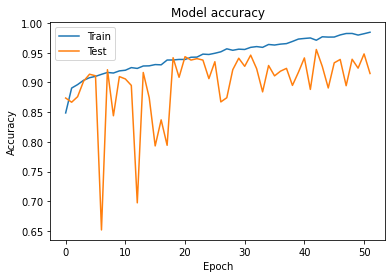

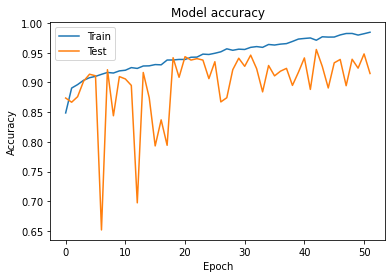

In [44]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()